In [13]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from konlpy.tag import Kkma
import pickle



In [14]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']

In [15]:
train_data = pd.read_csv('../data/dataset/train/train.csv')
train_data2 = train_data.copy()
train_data2['object_type'] = train_data2.object_entity.apply(lambda x: whatType(x))
train_data2['subject_type'] = train_data2.subject_entity.apply(lambda x: whatType(x))
train_data2.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG


In [17]:
train_data2.groupby(['object_type','label']).count().id

object_type  label              
DAT          no_relation            2087
             org:alternate_names       1
             org:dissolved            66
             org:founded             450
             org:member_of             5
                                    ... 
POH          per:product             120
             per:religion             14
             per:siblings             23
             per:spouse               26
             per:title              1845
Name: id, Length: 131, dtype: int64

In [22]:
train_data.source.unique()

array(['wikipedia', 'wikitree', 'policy_briefing'], dtype=object)

In [25]:
with open('../code/dict_label_to_num.pkl', 'rb') as f:
  dict_label_to_num = pickle.load(f)
  print(train_data2.subject_type.unique())
  print(train_data2[train_data2.subject_type=='PER'].label.unique())
  print(train_data2[train_data2.subject_type=='ORG'].label.unique())
  li=[]
  for i in train_data2[train_data2.subject_type=='PER'].label.unique():
    li.append(dict_label_to_num[i])
    # print(dict_label_to_num[i])
  print(sorted(li))
  li2=[]
  for i in train_data2[train_data2.subject_type=='ORG'].label.unique():
    li2.append(dict_label_to_num[i])
    # print(dict_label_to_num[i])
  print(sorted(li2))
  print(dict_label_to_num)

['ORG' 'PER']
['per:date_of_birth' 'per:employee_of' 'per:origin' 'per:title'
 'no_relation' 'per:schools_attended' 'per:colleagues'
 'per:alternate_names' 'per:spouse' 'per:children' 'per:place_of_birth'
 'per:parents' 'per:religion' 'per:date_of_death' 'per:place_of_residence'
 'per:other_family' 'per:siblings' 'per:product' 'per:place_of_death'
 'org:members' 'org:top_members/employees' 'org:founded_by'
 'org:place_of_headquarters']
['no_relation' 'org:member_of' 'org:top_members/employees'
 'org:alternate_names' 'org:place_of_headquarters' 'org:members'
 'org:founded_by' 'org:political/religious_affiliation' 'org:founded'
 'org:number_of_employees/members' 'org:dissolved' 'org:product']
[0, 1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 5, 7, 9, 18, 19, 20, 22, 28]
{'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headqua

In [29]:
train_data[train_data.sentence.str.len()>454]

,id,sentence,subject_entity,object_entity,label,source
22936,22936,그의 1984년 책인 《머릿속의 혁명: 비틀즈 음반과 60년대》 Revolution...,"{'word': '비틀즈', 'start_idx': 122, 'end_idx': 1...","{'word': 'The Beatles', 'start_idx': 60, 'end_...",per:alternate_names,wikipedia


In [21]:
dev_index = train_data2.groupby(['object_type','subject_type']).sample(n=20, random_state=42).index
dev_sample = train_data.iloc[dev_index]
train_sample = train_data.drop(dev_index)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_type.csv')
train_sample.to_csv('../data/dataset/train/train_type.csv')


(240, 6) (32230, 6)


label
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [7]:
train_sample.label.value_counts()

label
no_relation                            9441
org:top_members/employees              4265
per:employee_of                        3554
per:title                              2088
org:member_of                          1856
org:alternate_names                    1312
per:origin                             1223
org:place_of_headquarters              1187
per:date_of_birth                      1117
per:alternate_names                     997
per:spouse                              794
per:colleagues                          531
per:parents                             518
org:founded                             444
org:members                             418
per:date_of_death                       416
org:product                             376
per:children                            302
per:place_of_residence                  190
per:other_family                        190
per:place_of_birth                      163
org:founded_by                          155
per:siblings              

In [11]:
x=train_sample.label.value_counts()
x=1/x*1000
x.values


array([ 0.10592098,  0.23446659,  0.2813731 ,  0.4789272 ,  0.5387931 ,
        0.76219512,  0.81766149,  0.84245998,  0.89525515,  1.00300903,
        1.25944584,  1.88323917,  1.93050193,  2.25225225,  2.3923445 ,
        2.40384615,  2.65957447,  3.31125828,  5.26315789,  5.26315789,
        6.13496933,  6.4516129 ,  7.35294118,  7.40740741, 10.30927835,
       10.63829787, 12.19512195, 15.15151515, 23.25581395, 25.        ])

In [16]:
train_sample.label.values

array(['no_relation', 'no_relation', 'org:member_of', ...,
       'org:top_members/employees', 'no_relation',
       'org:top_members/employees'], dtype=object)

In [15]:
with open('../code/dict_label_to_num.pkl', 'rb') as f:
  dict_label_to_num = pickle.load(f)
  print(dict_label_to_num)
  print(x[dict_label_to_num.keys()])

{'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}
label
no_relation                             0.105921
org:top_members/employees               0.234467
org:members                             2.392344
org:product                             2.659574
per:title                               0.478927
org:alternate_names                 

In [4]:
dev_index = train_data2.groupby(['object_type','subject_type']).sample(n=50, random_state=42).index
dev_sample = train_data.iloc[dev_index]
train_sample = train_data.drop(dev_index)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_type4.csv')
train_sample.to_csv('../data/dataset/train/train_type4.csv')


(600, 6) (31870, 6)


In [7]:
train_data2.groupby(['object_type','subject_type']).count()

id  sentence  subject_entity  object_entity  \
object_type subject_type                                                  
DAT         ORG           2110      2110            2110           2110   
            PER           2139      2139            2139           2139   
LOC         ORG           1776      1776            1776           1776   
            PER           1785      1785            1785           1785   
NOH         ORG            260       260             260            260   
            PER            153       153             153            153   
ORG         ORG           5100      5100            5100           5100   
            PER           4246      4246            4246           4246   
PER         ORG           4779      4779            4779           4779   
            PER           5009      5009            5009           5009   
POH         ORG           1659      1659            1659           1659   
            PER           3454      3454            3454           3454   

                          label  source  
object_type subject_type                 
DAT         ORG            2110    2110  
            PER            2139    2139  
LOC         ORG            1776    1776  
            PER            1785    1785  
NOH         ORG             260     260  
            PER             153     153  
ORG         ORG            5100    5100  
            PER            4246    4246  
PER         ORG            4779    4779  
            PER            5009    5009  
POH         ORG            1659    1659  
            PER            3454    3454

In [13]:
train_data2.groupby(['object_type']).count()


,id,sentence,subject_entity,object_entity,label,source,subject_type
object_type,,,,,,,
DAT,4249,4249,4249,4249,4249,4249,4249
LOC,3561,3561,3561,3561,3561,3561,3561
NOH,413,413,413,413,413,413,413
ORG,9346,9346,9346,9346,9346,9346,9346
PER,9788,9788,9788,9788,9788,9788,9788
POH,5113,5113,5113,5113,5113,5113,5113


In [8]:
train_data3 = train_data2.groupby(['object_type','subject_type']).sample(n=153, random_state=42)
dev_index = train_data3.groupby(['object_type','subject_type']).sample(n=20, random_state=42).index
dev_sample = train_data.loc[dev_index, train_data.columns]
train_sample = train_data3.drop(dev_index).loc[: , train_data.columns]
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_type3.csv')
train_sample.to_csv('../data/dataset/train/train_type3.csv')


(240, 6) (1596, 6)


In [12]:
dev_sample

,id,sentence,subject_entity,object_entity,label,source
19190,19190,그러나 2009년 FC 서울에서 K리그에 출전하지 못하고 R리그에서만 6경기 출장 ...,"{'word': 'FC 서울', 'start_idx': 10, 'end_idx': ...","{'word': '2010', 'start_idx': 62, 'end_idx': 6...",no_relation,wikipedia
1556,1556,1907년(융희 1) 8월 5일부터 1908년 9월 30일까지 대구수형조합소(大邱手...,"{'word': '동양척식주식회사', 'start_idx': 79, 'end_idx...","{'word': '1908년', 'start_idx': 61, 'end_idx': ...",org:founded,wikipedia
1484,1484,"필리스가 1983년 월드 시리즈에서 볼티모어 오리올스에게 패한 후, 모건은 오클랜드...","{'word': '볼티모어 오리올스', 'start_idx': 20, 'end_id...","{'word': '1983', 'start_idx': 5, 'end_idx': 8,...",no_relation,wikipedia
23347,23347,"1996년 새정치국민회의 서대문구 을 조직책으로 임명되어 15대 총선, 16대 총선...","{'word': '새정치국민회의', 'start_idx': 6, 'end_idx':...","{'word': '1996년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
10408,10408,"2009년 한국시리즈에서 그의 감독 생활 첫 부임 팀이자, 스승 김성근 감독이 이끄...","{'word': 'SK 와이번스', 'start_idx': 51, 'end_idx'...","{'word': '2009년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
...,...,...,...,...,...,...
30150,30150,"추천사는 강용주 이사(재단법인 진실의 힘)를 시작으로 김삼호 광산구청장, 김승필 영...","{'word': '박주민', 'start_idx': 95, 'end_idx': 97...","{'word': '최고위원', 'start_idx': 71, 'end_idx': 7...",per:title,wikitree
17396,17396,최초의 완전한 유물론철학은 원자론주의자인 레우키포스와 데모크리토스(기원전 5세기)로...,"{'word': '데모크리토스', 'start_idx': 30, 'end_idx':...","{'word': '원자론', 'start_idx': 15, 'end_idx': 17...",per:product,wikipedia
13334,13334,"5월에는 《유희열의 스케치북》 100회 특집으로 이뤄진 ""레이블 특집""에서 Buda...","{'word': '45RPM', 'start_idx': 70, 'end_idx': ...","{'word': 'Buda Sound', 'start_idx': 42, 'end_i...",no_relation,wikipedia
12783,12783,타선은 낮은 타율이었지만 2루수에 신인인 곤도 아키히토를 기용하고 주전 유격수였던 ...,"{'word': '곤도 아키히토', 'start_idx': 23, 'end_idx'...","{'word': '2루수', 'start_idx': 14, 'end_idx': 16...",per:title,wikipedia


In [4]:
train2_data = pd.read_csv('../data/dataset/train/train2.csv')
train2_data2 = train2_data.copy()
train2_data2['object_type'] = train2_data2.object_entity.apply(lambda x: whatType(x))
train2_data2['subject_type'] = train2_data2.subject_entity.apply(lambda x: whatType(x))
train2_data2.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type
0,0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG
1,1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG
2,2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG
3,3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG
4,4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG


In [7]:
dev_index = train2_data2.groupby(['object_type','subject_type']).sample(n=20, random_state=42).index
dev_sample = train2_data2.iloc[dev_index]
train_sample = train2_data2.drop(dev_index).sample(frac=1,random_state=42)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_type2.csv')
train_sample.to_csv('../data/dataset/train/train_type2.csv')


(240, 9) (33424, 9)


In [6]:
dev_sample.head()

,id,sentence,subject_entity,object_entity,label,source
15152,15152,1948년 10월 30일부터 대한국민항공사(KNA)에서 서울 - 부산 간 국내선 노...,"{'word': '대한국민항공', 'start_idx': 16, 'end_idx':...","{'word': '1948년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
18346,18346,입단 첫 해에 당시 감독이었던 김응용의 총애를 받아 김응용이 2001년 삼성 라이온...,"{'word': '삼성 라이온즈', 'start_idx': 40, 'end_idx'...","{'word': '2001년', 'start_idx': 34, 'end_idx': ...",no_relation,wikipedia
28034,28034,1996년 3월 11일 13년간의 노동당 장기집권을 끝내고 총리에 취임하였다.,"{'word': '노동당', 'start_idx': 19, 'end_idx': 21...","{'word': '1996년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
17620,17620,2012 팔도 프로 야구 한국시리즈는 2012년 10월 24일부터 삼성 라이온즈와 ...,"{'word': '삼성 라이온즈', 'start_idx': 37, 'end_idx'...","{'word': '2012년', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia
11638,11638,"엎친 데 덮친 격으로 LG 트윈스에서는 선수들 사이의 불화가 끊이지 않았는데, 급기...","{'word': 'KIA 타이거즈', 'start_idx': 68, 'end_idx...","{'word': '2009년', 'start_idx': 48, 'end_idx': ...",no_relation,wikipedia


In [7]:
train_sample.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data2.drop(columns='label'), train_data2.label, test_size=0.2, shuffle=True, stratify=train_data2['label'], random_state=42)

In [9]:
x_train, x_valid, y_train, y_valid

(          id                                           sentence  \
 31875  31875  2003년을 끝으로 선수 생활을 마감하고 유격수 자리를 손시헌에게 넘긴 후, 200...   
 9518    9518  2010년 크리스마스에 요빌은 최하위를 기록하고 있었으나, 막스 에머와 폴 우튼 같...   
 29437  29437  중복인력 감축, 서울메트로, 서울특별시 도시철도공사 임원 인건비 절감으로 2027년...   
 29780  29780  그 결과 민주정의당 대표인 노태우가 대통령 직선제 개헌을 수용하는 6·29선언이 발...   
 27887  27887  한편 창당에 앞서 옛 유신당의 대표였던 마쓰노 요리히사는 과거 민주당을 탈당한 전력...   
 ...      ...                                                ...   
 31784  31784  모스크바 시간 기준 2015년 5월 12일, 암살당한 야당인사 보리스 넴초프가 한때...   
 22143  22143              김범수(金範洙, 1979년 1월 26일 ~)는 대한민국의 가수이다.   
 8825    8825  일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...   
 20549  20549  구자욱의 타구를 잡은 1루수 제이미 로맥이 1루를 찍은 뒤 2루로 뛰던 1루 주자를...   
 11625  11625  하지만 1945년 10월 24일에 벨로루시 소비에트 사회주의 공화국과 우크라이나 소...   
 
                                           subject_entity  \
 31875  {'word': '두산 베어스', 'start_idx': 51, 'end_idx':...   
 9518   {'word': '막스 에머', 'start_idx': 33, 'end_idx': ...   

In [10]:
train_data3 =train_data2.copy()
train_data3['complex']=train_data3.label+"-" + train_data3.object_type +"-"+ train_data3.subject_type
train_data3.head()


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,complex
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,no_relation-PER-ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,no_relation-ORG-ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,org:member_of-ORG-ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,org:top_members/employees-PER-ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,no_relation-DAT-ORG


In [11]:
complex_count = train_data3['complex'].value_counts()
complex_count[complex_count<10],complex_count[complex_count<10].size

(complex
 org:member_of-NOH-ORG             9
 per:alternate_names-LOC-PER       9
 per:other_family-POH-PER          7
 per:parents-LOC-PER               7
 per:place_of_residence-POH-PER    6
                                  ..
 per:children-DAT-PER              1
 per:place_of_birth-DAT-PER        1
 per:spouse-ORG-PER                1
 org:members-PER-PER               1
 per:other_family-ORG-PER          1
 Name: count, Length: 61, dtype: int64,
 61)

<Axes: xlabel='id', ylabel='label'>

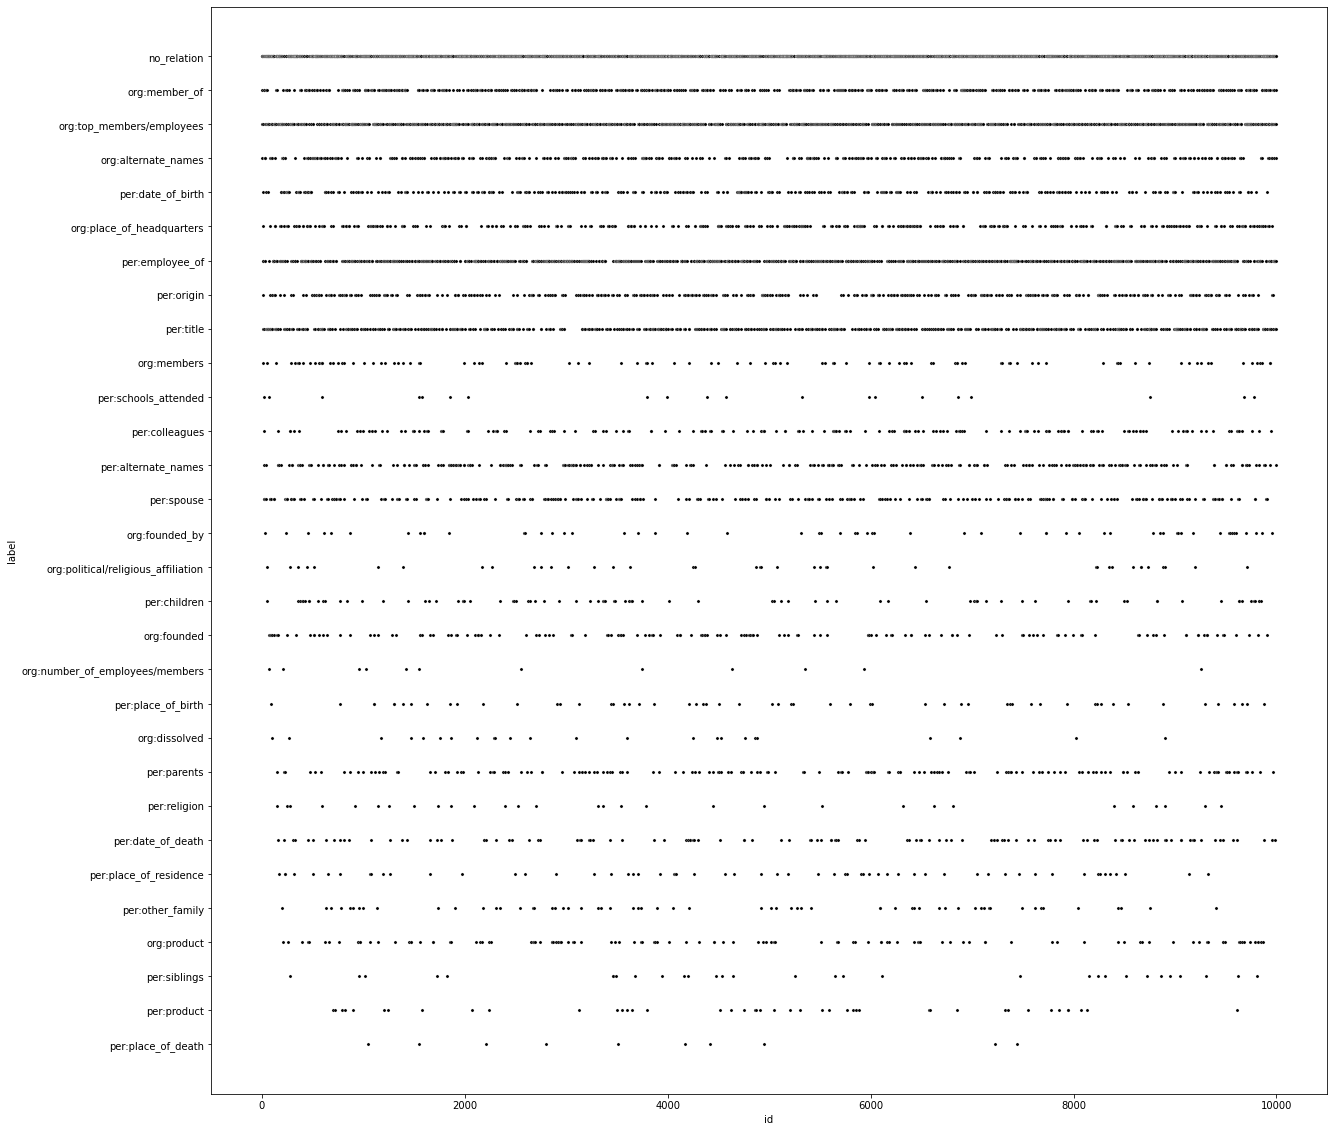

In [12]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=train_data2['id'].iloc[:10000],y= train_data2['label'].iloc[:10000],s=10,color='black')

In [13]:
dev_index = train_data2.groupby(['label']).sample(n=20, random_state=777).index
dev_sample = train_data.iloc[dev_index]
train_sample = train_data.drop(dev_index)
dev_sample.shape,train_sample.shape
dev_sample.to_csv('../data/dataset/train/dev_equal.csv')
train_sample.to_csv('../data/dataset/train/train_equal.csv')


In [14]:
train_data2['label'].value_counts().min()

40

In [15]:
dev_sample

,id,sentence,subject_entity,object_entity,label,source
10971,10971,"1995년, 독일 분데스리가의 VfB 슈투트가르트로 이적했으며, 두 번의 UEFA ...","{'word': 'VfB 슈투트가르트', 'start_idx': 17, 'end_i...","{'word': '2000년', 'start_idx': 56, 'end_idx': ...",no_relation,wikipedia
12581,12581,2015년 11월 7일에 열린 FC 서울과의 슈퍼매치경기에서 K리그 데뷔골을 넣었다.,"{'word': 'FC 서울', 'start_idx': 17, 'end_idx': ...","{'word': '2015', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
29103,29103,"그는 1952년부터 1968년까지 보스턴/밀워키/애틀랜타 브레이브스, 휴스턴 애스트...","{'word': '애틀랜타 브레이브스', 'start_idx': 27, 'end_i...","{'word': '보스턴', 'start_idx': 19, 'end_idx': 21...",no_relation,wikipedia
15511,15511,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《M...","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_id...","{'word': '2009', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
22170,22170,2017년 일본 삿포로 동계 아시안 게임 쇼트트랙 여자 500m 결승에서 막판 1위...,"{'word': '판커신', 'start_idx': 67, 'end_idx': 69...","{'word': '쇼트트랙', 'start_idx': 23, 'end_idx': 2...",no_relation,wikipedia
...,...,...,...,...,...,...
10461,10461,1963년 소련 물리학자 니콜라이 바소프와 올렉 크로힌 소련과학원 학술회원은 레이저...,"{'word': '니콜라이 바소프', 'start_idx': 14, 'end_idx...","{'word': '물리학자', 'start_idx': 9, 'end_idx': 12...",per:title,wikipedia
28871,28871,"이대수가 그 해 골든 글러브 유격수 부문을 수상하여 다시 한 번 ""연습생 신화""를 ...","{'word': '이대수', 'start_idx': 0, 'end_idx': 2, ...","{'word': '유격수', 'start_idx': 81, 'end_idx': 83...",per:title,wikipedia
21029,21029,1920년 후반부터 독립운동가들의 통합운동이 꾸준히 전개되어 1931년 상해에서 안...,"{'word': '안창호', 'start_idx': 45, 'end_idx': 47...","{'word': '독립운동가', 'start_idx': 11, 'end_idx': ...",per:title,wikipedia
13727,13727,"이 자리에는 김희겸 경기도 행정1부지사, 박광진 대한한돈협회 경기도협의회장, 김종태...","{'word': '김희겸', 'start_idx': 7, 'end_idx': 9, ...","{'word': '경기도 행정1부지사', 'start_idx': 11, 'end_i...",per:title,wikitree


In [16]:
train_data3.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,complex
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,no_relation-PER-ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,no_relation-ORG-ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,org:member_of-ORG-ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,org:top_members/employees-PER-ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,no_relation-DAT-ORG


In [17]:
train_data4 = train_data.copy()
train_data4['object_word'] = train_data4.object_entity.apply(lambda x: whatIsWord(x))
train_data4['subject_word'] = train_data4.subject_entity.apply(lambda x: whatIsWord(x))
train_data4.head()

,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,조지 해리슨,비틀즈
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,대안신당,민주평화당
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,한국프로축구연맹,광주FC
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,박정부,아성다이소
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,1967,요미우리 자이언츠


In [18]:
train_data4 = train_data.copy()
train_data4['object_word'] = train_data4.object_entity.apply(lambda x: whatIsWord(x))
train_data4['subject_word'] = train_data4.subject_entity.apply(lambda x: whatIsWord(x))
train_data4.head()

,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,조지 해리슨,비틀즈
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,대안신당,민주평화당
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,한국프로축구연맹,광주FC
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,박정부,아성다이소
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,1967,요미우리 자이언츠


In [19]:
from konlpy.tag import Kkma

tagger = Kkma()

def etc_cut(string,ob_word,sub_word,label):
    if label =='no_relation':
        return None
    sentence = string.split(' 등 ')
    sentence_front = sentence[0].split(',')[:-1]
    sentence_front=','.join(sentence_front).strip()
    if sentence_front==''  :
        return None
    word, tag =tagger.pos(sentence_front)[-1]
    if word !=')' and tag != 'NNG':
        return None
    if sentence_front[-2:] ==")은":
        return None

    result_sentence = sentence_front + ' 등 ' +' 등 '.join(sentence[1:])
    if result_sentence.find(' 등 ') <5:
        return None
    if result_sentence == string:
        return None
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None

def find_result(sentence, entity ,word):
    dic_sentence = eval(entity)
    start_idx = sentence.index(word)
    dic_sentence['start_idx'] =start_idx
    dic_sentence['end_idx'] =start_idx + len(word)-1
    return str(dic_sentence)



etc_data= train_data4[train_data4['sentence'].str.contains(' 등 ')]
etc_data2 = etc_data.copy()

etc_data2['sentence'] = etc_data['id'].apply(lambda x: etc_cut(etc_data['sentence'].loc[x], etc_data['object_word'].loc[x], etc_data['subject_word'].loc[x], etc_data['label'].loc[x]) )
etc_data2 = etc_data2.dropna()
etc_data2['subject_entity'] = etc_data2['id'].apply(lambda x: find_result(etc_data2['sentence'].loc[x],etc_data2['subject_entity'].loc[x],etc_data2['subject_word'].loc[x]))
etc_data2['object_entity'] = etc_data2['id'].apply(lambda x: find_result(etc_data2['sentence'].loc[x],etc_data2['object_entity'].loc[x],etc_data2['object_word'].loc[x]))
etc_data2


,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
18,18,"문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서...","{'word': '문성민', 'start_idx': 0, 'end_idx': 2, ...","{'word': '경기대', 'start_idx': 5, 'end_idx': 7, ...",per:schools_attended,wikipedia,경기대,문성민
112,112,"이날 출판기념회에는 서삼석 더불어민주당 전남도당위원장을 비롯하여, 이개호 국회의원 ...","{'word': '심상정', 'start_idx': 68, 'end_idx': 70...","{'word': '정의당', 'start_idx': 74, 'end_idx': 76...",per:employee_of,wikitree,정의당,심상정
161,161,"조인철 광주광역시 문화경제부시장은 지난 22일 중외공원 일원에 위치한 시립미술관, ...","{'word': '조인철', 'start_idx': 0, 'end_idx': 2, ...","{'word': '광주광역시 문화경제부시장', 'start_idx': 4, 'end...",per:title,wikitree,광주광역시 문화경제부시장,조인철
378,378,고양 혁신교육지구는 2017년 11월 29일 고양시와 경기도교육청 간 혁신교육지구 ...,"{'word': '고양시', 'start_idx': 25, 'end_idx': 27...","{'word': '경기도', 'start_idx': 30, 'end_idx': 32...",org:member_of,wikitree,경기도,고양시
393,393,"민주당 윤호중 사무총장, 송영길, 홍영표, 김영춘, 김정호 의원과 오거돈 부산시장,...","{'word': '유은혜', 'start_idx': 57, 'end_idx': 59...","{'word': '사회부총리 겸 교육부장관', 'start_idx': 61, 'en...",per:title,wikitree,사회부총리 겸 교육부장관,유은혜
...,...,...,...,...,...,...,...,...
32317,32317,"함평 모평마을 할머니들의 시낭송 공연, 김영진 전 농림부장관과 박성현 목포해양대학교...","{'word': '목포해양대', 'start_idx': 39, 'end_idx': ...","{'word': '박성현', 'start_idx': 35, 'end_idx': 37...",org:top_members/employees,wikitree,박성현,목포해양대
32447,32447,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...",org:members,wikitree,기획예산처,기획재정부
32452,32452,"스크라이크는 e스포츠, 농구, 야구 등 SK텔레콤이 운영 및 후원하는 각종 스포츠를...","{'word': 'SK텔레콤', 'start_idx': 22, 'end_idx': ...","{'word': 'SK그룹', 'start_idx': 62, 'end_idx': 6...",org:member_of,wikitree,SK그룹,SK텔레콤
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,부산 서구·동구,유기준


In [20]:
etc_data2.to_csv('../etc_dataset.csv')

In [21]:
print(etc_data['sentence'].loc[112])
print(etc_data['subject_entity'].loc[112])
print(etc_data['object_entity'].loc[112])

이날 출판기념회에는 서삼석 더불어민주당 전남도당위원장을 비롯하여, 이개호 국회의원, 김정호 국회의원 등 다수의 정치인들이 참석할 예정이며, 심상정의원(정의당 대표), 안규백 의원, 황주홍 의원, 진선미 의원은 영상으로 축하 메시지를 대신한다.
{'word': '심상정', 'start_idx': 78, 'end_idx': 80, 'type': 'PER'}
{'word': '정의당', 'start_idx': 84, 'end_idx': 86, 'type': 'ORG'}


In [22]:
print(etc_data2['sentence'].loc[18])
print(etc_data2['subject_entity'].loc[18])
print(etc_data2['object_entity'].loc[18])


문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서 하계대회, 전국체전 등 3관왕을 이룬다.
{'word': '문성민', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
{'word': '경기대', 'start_idx': 5, 'end_idx': 7, 'type': 'ORG'}


In [23]:
def bracket_cut(string,ob_word,sub_word):

    pattern = r"\([^)]+\)"
    result_sentence = re.sub(pattern, "", string)
    if result_sentence.count('(') != result_sentence.count(')'):
        return None
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None

bracket_data= train_data4[(train_data4['sentence'].str.contains('\(')) & (train_data4.label != 'no_relation')]


bracket_data2= bracket_data.copy()
bracket_data2['sentence'] = bracket_data2['id'].apply(lambda x: bracket_cut(bracket_data2['sentence'].loc[x], bracket_data2['object_word'].loc[x], bracket_data2['subject_word'].loc[x]))
bracket_data2 = bracket_data2.dropna()
bracket_data2['subject_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['subject_entity'].loc[x],bracket_data2['subject_word'].loc[x]))
bracket_data2['object_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['object_entity'].loc[x],bracket_data2['object_word'].loc[x]))

bracket_data2

,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree,싱어송라이터,빌리 아일리시
40,40,배우 장신영 씨와 남편 강경준 씨가 둘째를 품에 안았다.,"{'word': '강경준', 'start_idx': 13, 'end_idx': 15...","{'word': '장신영', 'start_idx': 3, 'end_idx': 5, ...",per:spouse,wikitree,장신영,강경준
67,67,"1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18...","{'word': '롯데 자이언츠', 'start_idx': 95, 'end_idx'...","{'word': '1984년', 'start_idx': 0, 'end_idx': 4...",org:founded,wikipedia,1984년,롯데 자이언츠
75,75,더군다나 이날 경기에는 잔니 인판티노 국제축구연맹 회장까지 관전했지만 북한은 '무관...,"{'word': '국제축구연맹', 'start_idx': 21, 'end_idx':...","{'word': '잔니 인판티노', 'start_idx': 13, 'end_idx'...",org:top_members/employees,wikitree,잔니 인판티노,국제축구연맹
76,76,"1727년, 옹정제는 자신의 심복이자 과거 사천 순무로 그 곳 사정을 잘 알던 연갱...","{'word': '연갱요', 'start_idx': 44, 'end_idx': 46...","{'word': '무원대장군', 'start_idx': 49, 'end_idx': ...",per:title,wikipedia,무원대장군,연갱요
...,...,...,...,...,...,...,...,...
32397,32397,브리사의 단종 이후 약 6년 동안 비었던 소형차의 자리를 채운 프라이드는 3도어 해...,"{'word': '기아산업', 'start_idx': 83, 'end_idx': 8...","{'word': '기아자동차', 'start_idx': 168, 'end_idx':...",org:alternate_names,wikipedia,기아자동차,기아산업
32402,32402,"1990년 국가보훈처에 의해 이상룡, 이승화, 이광민 등 재만독립운동가들의 유해와 ...","{'word': '이광민', 'start_idx': 26, 'end_idx': 28...","{'word': '독립운동가', 'start_idx': 34, 'end_idx': ...",per:title,wikipedia,독립운동가,이광민
32409,32409,중세 세르비아 공국의 수도였던 스타리라스가 사라진 뒤에 설립된 것으로 추정된다.,"{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...","{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...",org:members,wikipedia,스타리라스,중세 세르비아 공국
32433,32433,"2008년 11월 5일, 드미트리 메드베데프 러시아 대통령은 모스크바 크렘린궁에서 ...","{'word': '드미트리 메드베데프', 'start_idx': 14, 'end_i...","{'word': '러시아', 'start_idx': 25, 'end_idx': 27...",per:place_of_residence,wikipedia,러시아,드미트리 메드베데프


In [24]:

text = "서울은퇴공무원상록자원봉사단은 2019년 4월 공무원연금공단(이사장 정남준) 서울지부의 후원으로 결성된 단체로서 ‘구세군자선냄비 거리모금’ 활동에 적극 참여하여 표창을 수여받게 되었으며, 이외에도 ‘제100회 서울시 전국체육대회’ 및 ‘제39회 전국장애인체육대회’의 성공적 개최를 위한 자원봉사활동에도 참여하는 등 사회공헌활동을 활발히 펼쳤다."

# 괄호와 괄호 안의 내용을 제거하는 정규 표현식
pattern = r"\([^)]+\)"

# 정규 표현식을 사용하여 문자열에서 패턴에 해당하는 부분을 제거
modified_text = re.sub(pattern, "", text)

print(modified_text)

서울은퇴공무원상록자원봉사단은 2019년 4월 공무원연금공단 서울지부의 후원으로 결성된 단체로서 ‘구세군자선냄비 거리모금’ 활동에 적극 참여하여 표창을 수여받게 되었으며, 이외에도 ‘제100회 서울시 전국체육대회’ 및 ‘제39회 전국장애인체육대회’의 성공적 개최를 위한 자원봉사활동에도 참여하는 등 사회공헌활동을 활발히 펼쳤다.


In [25]:
bracket_data3= bracket_data2[train_data.columns]
etc_data3 = etc_data2[train_data.columns]

In [26]:
bracket_data3

,id,sentence,subject_entity,object_entity,label,source
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree
40,40,배우 장신영 씨와 남편 강경준 씨가 둘째를 품에 안았다.,"{'word': '강경준', 'start_idx': 13, 'end_idx': 15...","{'word': '장신영', 'start_idx': 3, 'end_idx': 5, ...",per:spouse,wikitree
67,67,"1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18...","{'word': '롯데 자이언츠', 'start_idx': 95, 'end_idx'...","{'word': '1984년', 'start_idx': 0, 'end_idx': 4...",org:founded,wikipedia
75,75,더군다나 이날 경기에는 잔니 인판티노 국제축구연맹 회장까지 관전했지만 북한은 '무관...,"{'word': '국제축구연맹', 'start_idx': 21, 'end_idx':...","{'word': '잔니 인판티노', 'start_idx': 13, 'end_idx'...",org:top_members/employees,wikitree
76,76,"1727년, 옹정제는 자신의 심복이자 과거 사천 순무로 그 곳 사정을 잘 알던 연갱...","{'word': '연갱요', 'start_idx': 44, 'end_idx': 46...","{'word': '무원대장군', 'start_idx': 49, 'end_idx': ...",per:title,wikipedia
...,...,...,...,...,...,...
32397,32397,브리사의 단종 이후 약 6년 동안 비었던 소형차의 자리를 채운 프라이드는 3도어 해...,"{'word': '기아산업', 'start_idx': 83, 'end_idx': 8...","{'word': '기아자동차', 'start_idx': 168, 'end_idx':...",org:alternate_names,wikipedia
32402,32402,"1990년 국가보훈처에 의해 이상룡, 이승화, 이광민 등 재만독립운동가들의 유해와 ...","{'word': '이광민', 'start_idx': 26, 'end_idx': 28...","{'word': '독립운동가', 'start_idx': 34, 'end_idx': ...",per:title,wikipedia
32409,32409,중세 세르비아 공국의 수도였던 스타리라스가 사라진 뒤에 설립된 것으로 추정된다.,"{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...","{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...",org:members,wikipedia
32433,32433,"2008년 11월 5일, 드미트리 메드베데프 러시아 대통령은 모스크바 크렘린궁에서 ...","{'word': '드미트리 메드베데프', 'start_idx': 14, 'end_i...","{'word': '러시아', 'start_idx': 25, 'end_idx': 27...",per:place_of_residence,wikipedia


In [27]:
data_argument = pd.concat([train_data, bracket_data3])
data_argument = pd.concat([data_argument, etc_data3])
data_argument.id= range(data_argument.shape[0])
data_argument.index = range(data_argument.shape[0])
data_argument.to_csv('../data/dataset/train/train_argument.csv')

data_argument

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
37607,37607,"함평 모평마을 할머니들의 시낭송 공연, 김영진 전 농림부장관과 박성현 목포해양대학교...","{'word': '목포해양대', 'start_idx': 39, 'end_idx': ...","{'word': '박성현', 'start_idx': 35, 'end_idx': 37...",org:top_members/employees,wikitree
37608,37608,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...",org:members,wikitree
37609,37609,"스크라이크는 e스포츠, 농구, 야구 등 SK텔레콤이 운영 및 후원하는 각종 스포츠를...","{'word': 'SK텔레콤', 'start_idx': 22, 'end_idx': ...","{'word': 'SK그룹', 'start_idx': 62, 'end_idx': 6...",org:member_of,wikitree
37610,37610,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree


<Axes: xlabel='label'>

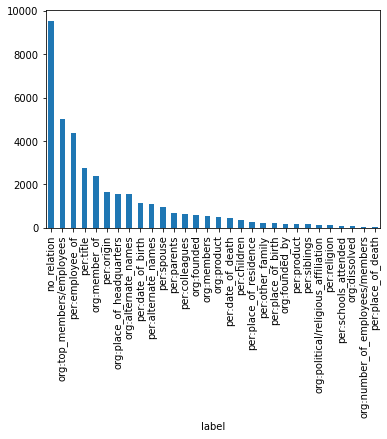

In [28]:
data_argument.label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

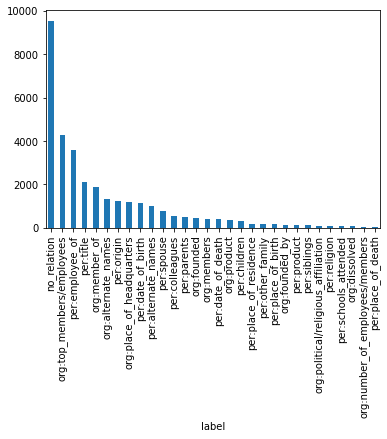

In [29]:
train_data.label.value_counts().plot(kind='bar')


In [1]:
train_data.label.value_counts()

NameError: name 'train_data' is not defined

<Axes: xlabel='label'>

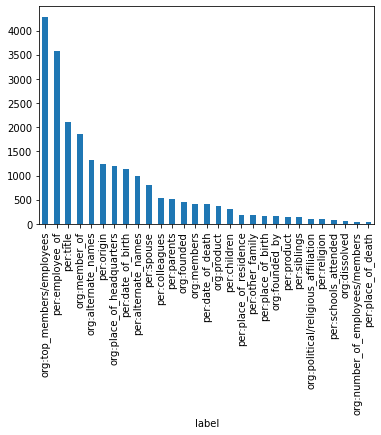

In [30]:
train_data[train_data.label != 'no_relation'].label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

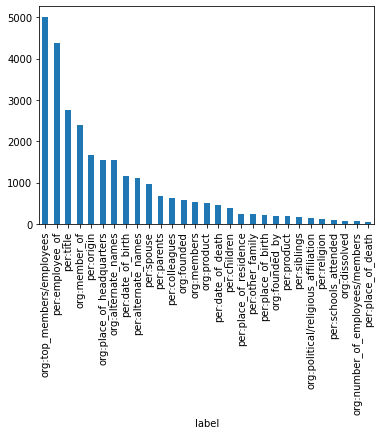

In [31]:
data_argument[data_argument.label != 'no_relation'].label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

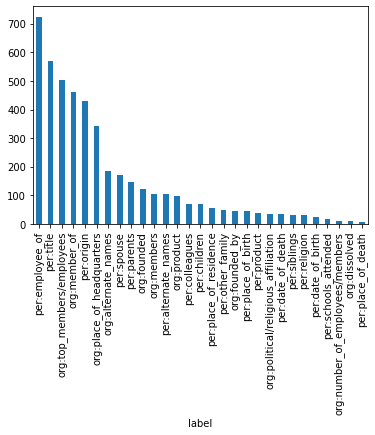

In [32]:
bracket_data3.label.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

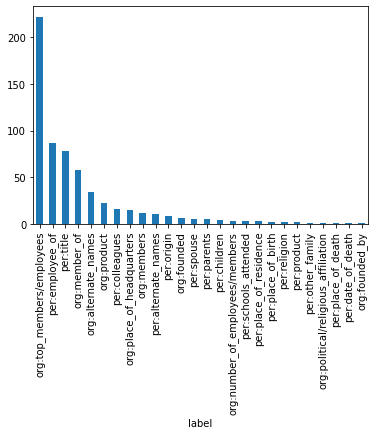

In [33]:
etc_data3.label.value_counts().plot(kind='bar')


In [34]:
data_argument.label.value_counts()

label
no_relation                            9534
org:top_members/employees              5010
per:employee_of                        4384
per:title                              2750
org:member_of                          2385
per:origin                             1671
org:place_of_headquarters              1553
org:alternate_names                    1539
per:date_of_birth                      1153
per:alternate_names                    1117
per:spouse                              970
per:parents                             673
per:colleagues                          621
org:founded                             577
org:members                             537
org:product                             499
per:date_of_death                       454
per:children                            378
per:place_of_residence                  252
per:other_family                        241
per:place_of_birth                      213
org:founded_by                          202
per:product               

In [35]:
train_data.label.value_counts()

label
no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [36]:
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1

In [37]:

data_argument2 = data_argument.copy()
data_argument2['object_type'] = data_argument2.object_entity.apply(lambda x: whatType(x))
data_argument2['subject_type'] = data_argument2.subject_entity.apply(lambda x: whatType(x))
data_argument2['fast']= data_argument2['id'].apply(lambda x: when_start(data_argument2['object_entity'].loc[x],data_argument2['subject_entity'].loc[x]))
data_argument2

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,1
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,1
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,0
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,0
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,1
...,...,...,...,...,...,...,...,...,...
37607,37607,"함평 모평마을 할머니들의 시낭송 공연, 김영진 전 농림부장관과 박성현 목포해양대학교...","{'word': '목포해양대', 'start_idx': 39, 'end_idx': ...","{'word': '박성현', 'start_idx': 35, 'end_idx': 37...",org:top_members/employees,wikitree,PER,ORG,1
37608,37608,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...",org:members,wikitree,ORG,ORG,1
37609,37609,"스크라이크는 e스포츠, 농구, 야구 등 SK텔레콤이 운영 및 후원하는 각종 스포츠를...","{'word': 'SK텔레콤', 'start_idx': 22, 'end_idx': ...","{'word': 'SK그룹', 'start_idx': 62, 'end_idx': 6...",org:member_of,wikitree,ORG,ORG,0
37610,37610,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,LOC,PER,0


In [38]:
dev_index = data_argument2.groupby(['label']).sample(n=20, random_state=777).index
dev_sample = data_argument.iloc[dev_index]
dev_sample = dev_sample.sample(frac=1, random_state=777)
train_sample = data_argument.drop(dev_index)
train_sample =train_sample.sample(frac=1, random_state=777)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_arg_equal.csv')
train_sample.to_csv('../data/dataset/train/train_arg_equal.csv')

(600, 6) (37012, 6)


In [41]:
data_argument.shape

(37612, 6)

In [50]:
no_have_norel = data_argument.copy()
remove_no = data_argument2[data_argument2.label == 'no_relation']
print(remove_no.shape)
remove_no_idx = remove_no.groupby(['object_type','subject_type','fast']).sample(frac=0.7, random_state=777).index
print(remove_no_idx.shape)
no_have_norel=no_have_norel.drop(remove_no_idx)
no_have_norel.id=range(no_have_norel.shape[0])
no_have_norel.index=range(no_have_norel.shape[0])
no_have_norel.to_csv('../data/dataset/train/no_half_train.csv')
no_have_norel.shape

(9534, 9)
(6673,)


(30939, 6)

In [ ]:
remove_no.groupby(['object_type','subject_type','fast']).count()

id  sentence  subject_entity  object_entity  \
object_type subject_type fast                                                  
DAT         ORG          0      419       419             419            419   
                         1     1163      1163            1163           1163   
            PER          0      215       215             215            215   
                         1      290       290             290            290   
LOC         ORG          0      290       290             290            290   
                         1      258       258             258            258   
            PER          0      188       188             188            188   
                         1      122       122             122            122   
NOH         ORG          0      154       154             154            154   
                         1       38        38              38             38   
            PER          0       76        76              76             76   
                         1       42        42              42             42   
ORG         ORG          0      898       898             898            898   
                         1     1060      1060            1060           1060   
            PER          0      422       422             422            422   
                         1      319       319             319            319   
PER         ORG          0      160       160             160            160   
                         1      241       241             241            241   
            PER          0      659       659             659            659   
                         1      740       740             740            740   
POH         ORG          0      401       401             401            401   
                         1      324       324             324            324   
            PER          0      563       563             563            563   
                         1      492       492             492            492   

                               label  source  
object_type subject_type fast                 
DAT         ORG          0       419     419  
                         1      1163    1163  
            PER          0       215     215  
                         1       290     290  
LOC         ORG          0       290     290  
                         1       258     258  
            PER          0       188     188  
                         1       122     122  
NOH         ORG          0       154     154  
                         1        38      38  
            PER          0        76      76  
                         1        42      42  
ORG         ORG          0       898     898  
                         1      1060    1060  
            PER          0       422     422  
                         1       319     319  
PER         ORG          0       160     160  
                         1       241     241  
            PER          0       659     659  
                         1       740     740  
POH         ORG          0       401     401  
                         1       324     324  
            PER          0       563     563  
                         1       492     492

In [ ]:
dev_index = no_have_norel.groupby(['label']).sample(n=20, random_state=777).index
dev_sample = no_have_norel.iloc[dev_index]
dev_sample = dev_sample.sample(frac=1, random_state=777)
train_sample = no_have_norel.drop(dev_index)
train_sample =train_sample.sample(frac=1, random_state=777)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_norel_0.3_arg_equal.csv')
train_sample.to_csv('../data/dataset/train/train_norel_0.3_arg_equal.csv')

(600, 6) (30339, 6)


<Axes: xlabel='label'>

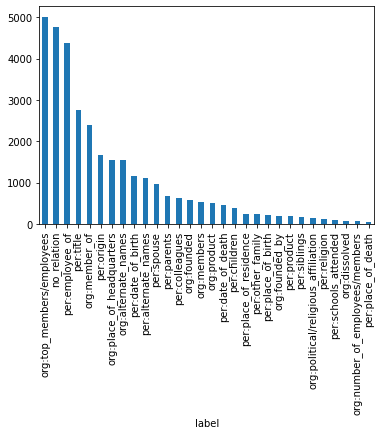

In [ ]:
no_have_norel.label.value_counts().plot(kind='bar')

In [ ]:
etc_data2.shape

(603, 8)

In [ ]:
bracket_data3.shape

(4539, 6)

In [ ]:
etc_data3.to_csv('../etc_dataset.csv')

In [ ]:
bracket_data3.to_csv('../bracket_dataset.csv')

In [ ]:
text= "부산지방경찰청(청장 김창룡)은 등 주요사건 및 범죄취약지역에 대한 치안 불안감 해소와 시민 안전을 위해 '형사기동대'를 운영하기로 하였다.,"

tagger = Kkma()
print(tagger.pos(text))

[('부산', 'NNG'), ('지방', 'NNG'), ('경찰청', 'NNG'), ('(', 'SS'), ('청장', 'NNG'), ('김창룡', 'NNG'), (')', 'SS'), ('은', 'NNG'), ('등', 'NNB'), ('주요', 'NNG'), ('사건', 'NNG'), ('및', 'MAG'), ('범죄', 'NNG'), ('취약', 'NNG'), ('지역', 'NNG'), ('에', 'JKM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('치안', 'NNG'), ('불안감', 'NNG'), ('해소', 'NNG'), ('와', 'JC'), ('시민', 'NNG'), ('안전', 'NNG'), ('을', 'JKO'), ('위하', 'VV'), ('어', 'ECS'), ("'", 'SS'), ('형사', 'NNG'), ('기동대', 'NNG'), ("'", 'SS'), ('를', 'JKO'), ('운영', 'NNG'), ('하', 'XSV'), ('기로', 'ECD'), ('하', 'VX'), ('였', 'EPT'), ('다', 'EFN'), ('.', 'SF'), (',', 'SP')]


In [ ]:
text= "부산지방경찰청(청장 김창룡)은"
if text[-2:] ==")은":
    print(1)
else:
    print(0)

1


In [ ]:
dev_index = no_have_norel.groupby(['label']).sample(frac=0.3, random_state=777).index
dev_sample = no_have_norel.iloc[dev_index]
dev_sample = dev_sample.sample(frac=1, random_state=777)
train_sample = no_have_norel.drop(dev_index)
train_sample =train_sample.sample(frac=1, random_state=777)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_norel_half_arg.csv')
train_sample.to_csv('../data/dataset/train/train_norel_half_arg.csv')

(9853, 6) (22990, 6)


In [ ]:
train_data2[(train_data2.subject_type != 'ORG') & (train_data2.subject_type != 'PER')]


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type


In [ ]:
train_data2.object_type.unique()

array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object)

In [ ]:
dataset= train_data2.copy()

dataset['sentence'] = dataset['id'].apply(lambda x: re.sub(rf'{dataset.subject_entity.loc[x]}',f'<{dataset.subject_type.loc[x]}>',dataset.sentence.loc[x]))
dataset['sentence'] = dataset['id'].apply(lambda x: re.sub(rf'{dataset.object_entity.loc[x]}',f'<{dataset.object_type.loc[x]}>',dataset.sentence.loc[x]))
dataset.sentence

0        〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...
1        호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...
2        K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...
3        균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...
4        1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...
                               ...                        
32465    한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...
32466    법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...
32467    완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...
32468    중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...
32469    화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...
Name: sentence, Length: 32470, dtype: object

In [ ]:
import pickle as pickle
import os
import pandas as pd
import torch
import re


class RE_Dataset(torch.utils.data.Dataset):
  """ Dataset 구성을 위한 class."""
  def __init__(self, pair_dataset, labels):
    self.pair_dataset = pair_dataset
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  subject_type= []
  object_type= []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    # i = i[1:-1].split(',')[0].split(':')[1]
    sub_entity = eval(i)
    ob_entity = eval(j)
    sub_word= sub_entity['word']
    sub_type = sub_entity['type']
    # j = j[1:-1].split(',')[0].split(':')[1]
    ob_word = ob_entity['word']
    ob_type = ob_entity['type']


    subject_entity.append(sub_word)
    object_entity.append(ob_word)
    subject_type.append(sub_type)
    object_type.append(ob_type)
  
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],
                              'subject_type' : subject_type, 'object_type': object_type})
  return out_dataset

def load_data(dataset_dir):
  """ csv 파일을 경로에 맡게 불러 옵니다. """
  pd_dataset = pd.read_csv(dataset_dir)
  dataset = preprocessing_dataset(pd_dataset)
  
  return dataset



def change_word(sentence, sub_word, sub_type , ob_word, ob_type):
  sentence = re.sub(rf'{sub_word}',f'{sub_type}',sentence)
  sentence = re.sub(rf'{ob_word}',f'{ob_type}',sentence)

  return sentence




def tokenized_dataset(dataset):
  """ tokenizer에 따라 sentence를 tokenizing 합니다."""
  concat_entity = []
  for e01, e02 in zip(dataset['subject_entity'], dataset['object_entity']):
    temp = ''
    temp = e01 + '[SEP]' + e02
    concat_entity.append(temp)
  print(dataset.head())
  dataset['sentence'] = dataset['id'].apply(lambda x: change_word(dataset.sentence.loc[x],dataset.subject_entity.loc[x],
                                                                  dataset.subject_type.loc[x],dataset.object_entity.loc[x], dataset.object_type.loc[x]))
#   tokenizer.add_special_tokens({ "additional_special_tokens": ['<PER>', '<ORG>', '<DAT>', '<LOC>', '<POH>', '<NOH>']})
#   tokenized_sentences = tokenizer(
#       concat_entity,
#       list(dataset['sentence']),
#       return_tensors="pt",
#       padding=True,
#       truncation=True,
#       max_length=256,
#       add_special_tokens=True,
#       )
  return dataset



In [45]:
dev_dataset = pd.read_csv("../data/dataset/train/dev_norel_0.3_arg_equal.csv") # validation용 데이터는 따로 만드셔야 합니다.
dev_dataset


,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,28425,28425,박영선 중소벤처기업부 장관이 지난 5월 세종시 중앙공원에서 열린 세종 자율주행실증 ...,"{'word': '중소벤처기업부', 'start_idx': 4, 'end_idx':...","{'word': '박영선', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,policy_briefing
1,558,558,밴드는 마이클 잭슨의 《Thriller》 음반 제작을 돕고 같은 해 시카고의 컴백 ...,"{'word': '마이클 잭슨', 'start_idx': 4, 'end_idx': ...","{'word': 'Thriller', 'start_idx': 13, 'end_idx...",per:product,wikipedia
2,9507,9507,"그 다음으로는 인교진·소이현 부부, 추자현·우효광 부부, 이상순·이효리 부부, 윤상...","{'word': '소이현', 'start_idx': 12, 'end_idx': 14...","{'word': '인교진', 'start_idx': 8, 'end_idx': 10,...",per:spouse,wikitree
3,14763,14763,형 필리프 5세의 사후 왕위를 이어받은 샤를 4세는 1322년 2월 21일 정식으로...,"{'word': '샤를 4세', 'start_idx': 22, 'end_idx': ...","{'word': '필리프 5세', 'start_idx': 2, 'end_idx': ...",per:siblings,wikipedia
4,23077,23077,여기에 대원방송 성우극회가 출범한 이후로 대원방송 성우극회 1기 출신 성우 최낙윤에...,"{'word': '최낙윤', 'start_idx': 42, 'end_idx': 44...","{'word': '대원방송 성우극회 1기', 'start_idx': 23, 'end...",per:origin,wikipedia
...,...,...,...,...,...,...,...
595,1104,1104,펠리피 멜루 비센치 지 카르발류(1983년 6월 26일 ~)는 브라질의 축구 선수이다.,"{'word': '펠리피 멜루', 'start_idx': 0, 'end_idx': ...","{'word': '브라질', 'start_idx': 35, 'end_idx': 37...",per:place_of_birth,wikipedia
596,11380,11380,2016년 12월 11일(이하 한국시간) 영국 맨체스터의 올드 트래퍼드에서 열린 맨...,"{'word': '토트넘 홋스퍼', 'start_idx': 49, 'end_idx'...","{'word': '프리미어리그', 'start_idx': 73, 'end_idx':...",org:member_of,wikipedia
597,269,269,이후 동아일보는 일제에 의해 8월 29일자부터 무기 정간 처분을 당하면서 1920년...,"{'word': '동아일보', 'start_idx': 3, 'end_idx': 6,...","{'word': '1920년', 'start_idx': 41, 'end_idx': ...",org:founded,wikipedia
598,19607,19607,한편 윤봉길의 부인 배용순과 동생 윤남의는 1976년에 위 사진의 인물이 윤봉길이 ...,"{'word': '윤봉길', 'start_idx': 3, 'end_idx': 5, ...","{'word': '배용순', 'start_idx': 11, 'end_idx': 13...",per:spouse,wikipedia


In [51]:
dev_index = no_have_norel.groupby(['label']).sample(frac=0.3, random_state=777).index
dev_sample = no_have_norel.iloc[dev_index]
dev_sample = dev_sample.sample(frac=1, random_state=777)
train_sample = no_have_norel.drop(dev_index)
train_sample =train_sample.sample(frac=1, random_state=777)
print(dev_sample.shape,train_sample.shape)
dev_sample.to_csv('../data/dataset/train/dev_norel_0.3_arg.csv')
train_sample.to_csv('../data/dataset/train/train_norel_0.3_arg.csv')

(9281, 6) (21658, 6)


In [4]:
train_data2.groupby(['object_type','subject_type']).count()

id  sentence  subject_entity  object_entity  \
object_type subject_type                                                  
DAT         ORG           2110      2110            2110           2110   
            PER           2139      2139            2139           2139   
LOC         ORG           1776      1776            1776           1776   
            PER           1785      1785            1785           1785   
NOH         ORG            260       260             260            260   
            PER            153       153             153            153   
ORG         ORG           5100      5100            5100           5100   
            PER           4246      4246            4246           4246   
PER         ORG           4779      4779            4779           4779   
            PER           5009      5009            5009           5009   
POH         ORG           1659      1659            1659           1659   
            PER           3454      3454            3454           3454   

                          label  source  
object_type subject_type                 
DAT         ORG            2110    2110  
            PER            2139    2139  
LOC         ORG            1776    1776  
            PER            1785    1785  
NOH         ORG             260     260  
            PER             153     153  
ORG         ORG            5100    5100  
            PER            4246    4246  
PER         ORG            4779    4779  
            PER            5009    5009  
POH         ORG            1659    1659  
            PER            3454    3454

In [12]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1

In [13]:
tra = pd.read_csv('../data/dataset/train/train_arg_total.csv')
tra2 = train_data.copy()
tra2['object_type'] = tra2.object_entity.apply(lambda x: whatType(x))
tra2['subject_type'] = tra2.subject_entity.apply(lambda x: whatType(x))
tra2['fast']= tra2.id.apply(lambda x: when_start(tra2['object_entity'].loc[x],tra2['subject_entity'].loc[x]))

tra2.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,fast
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,1
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,1
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,0
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,0
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,1


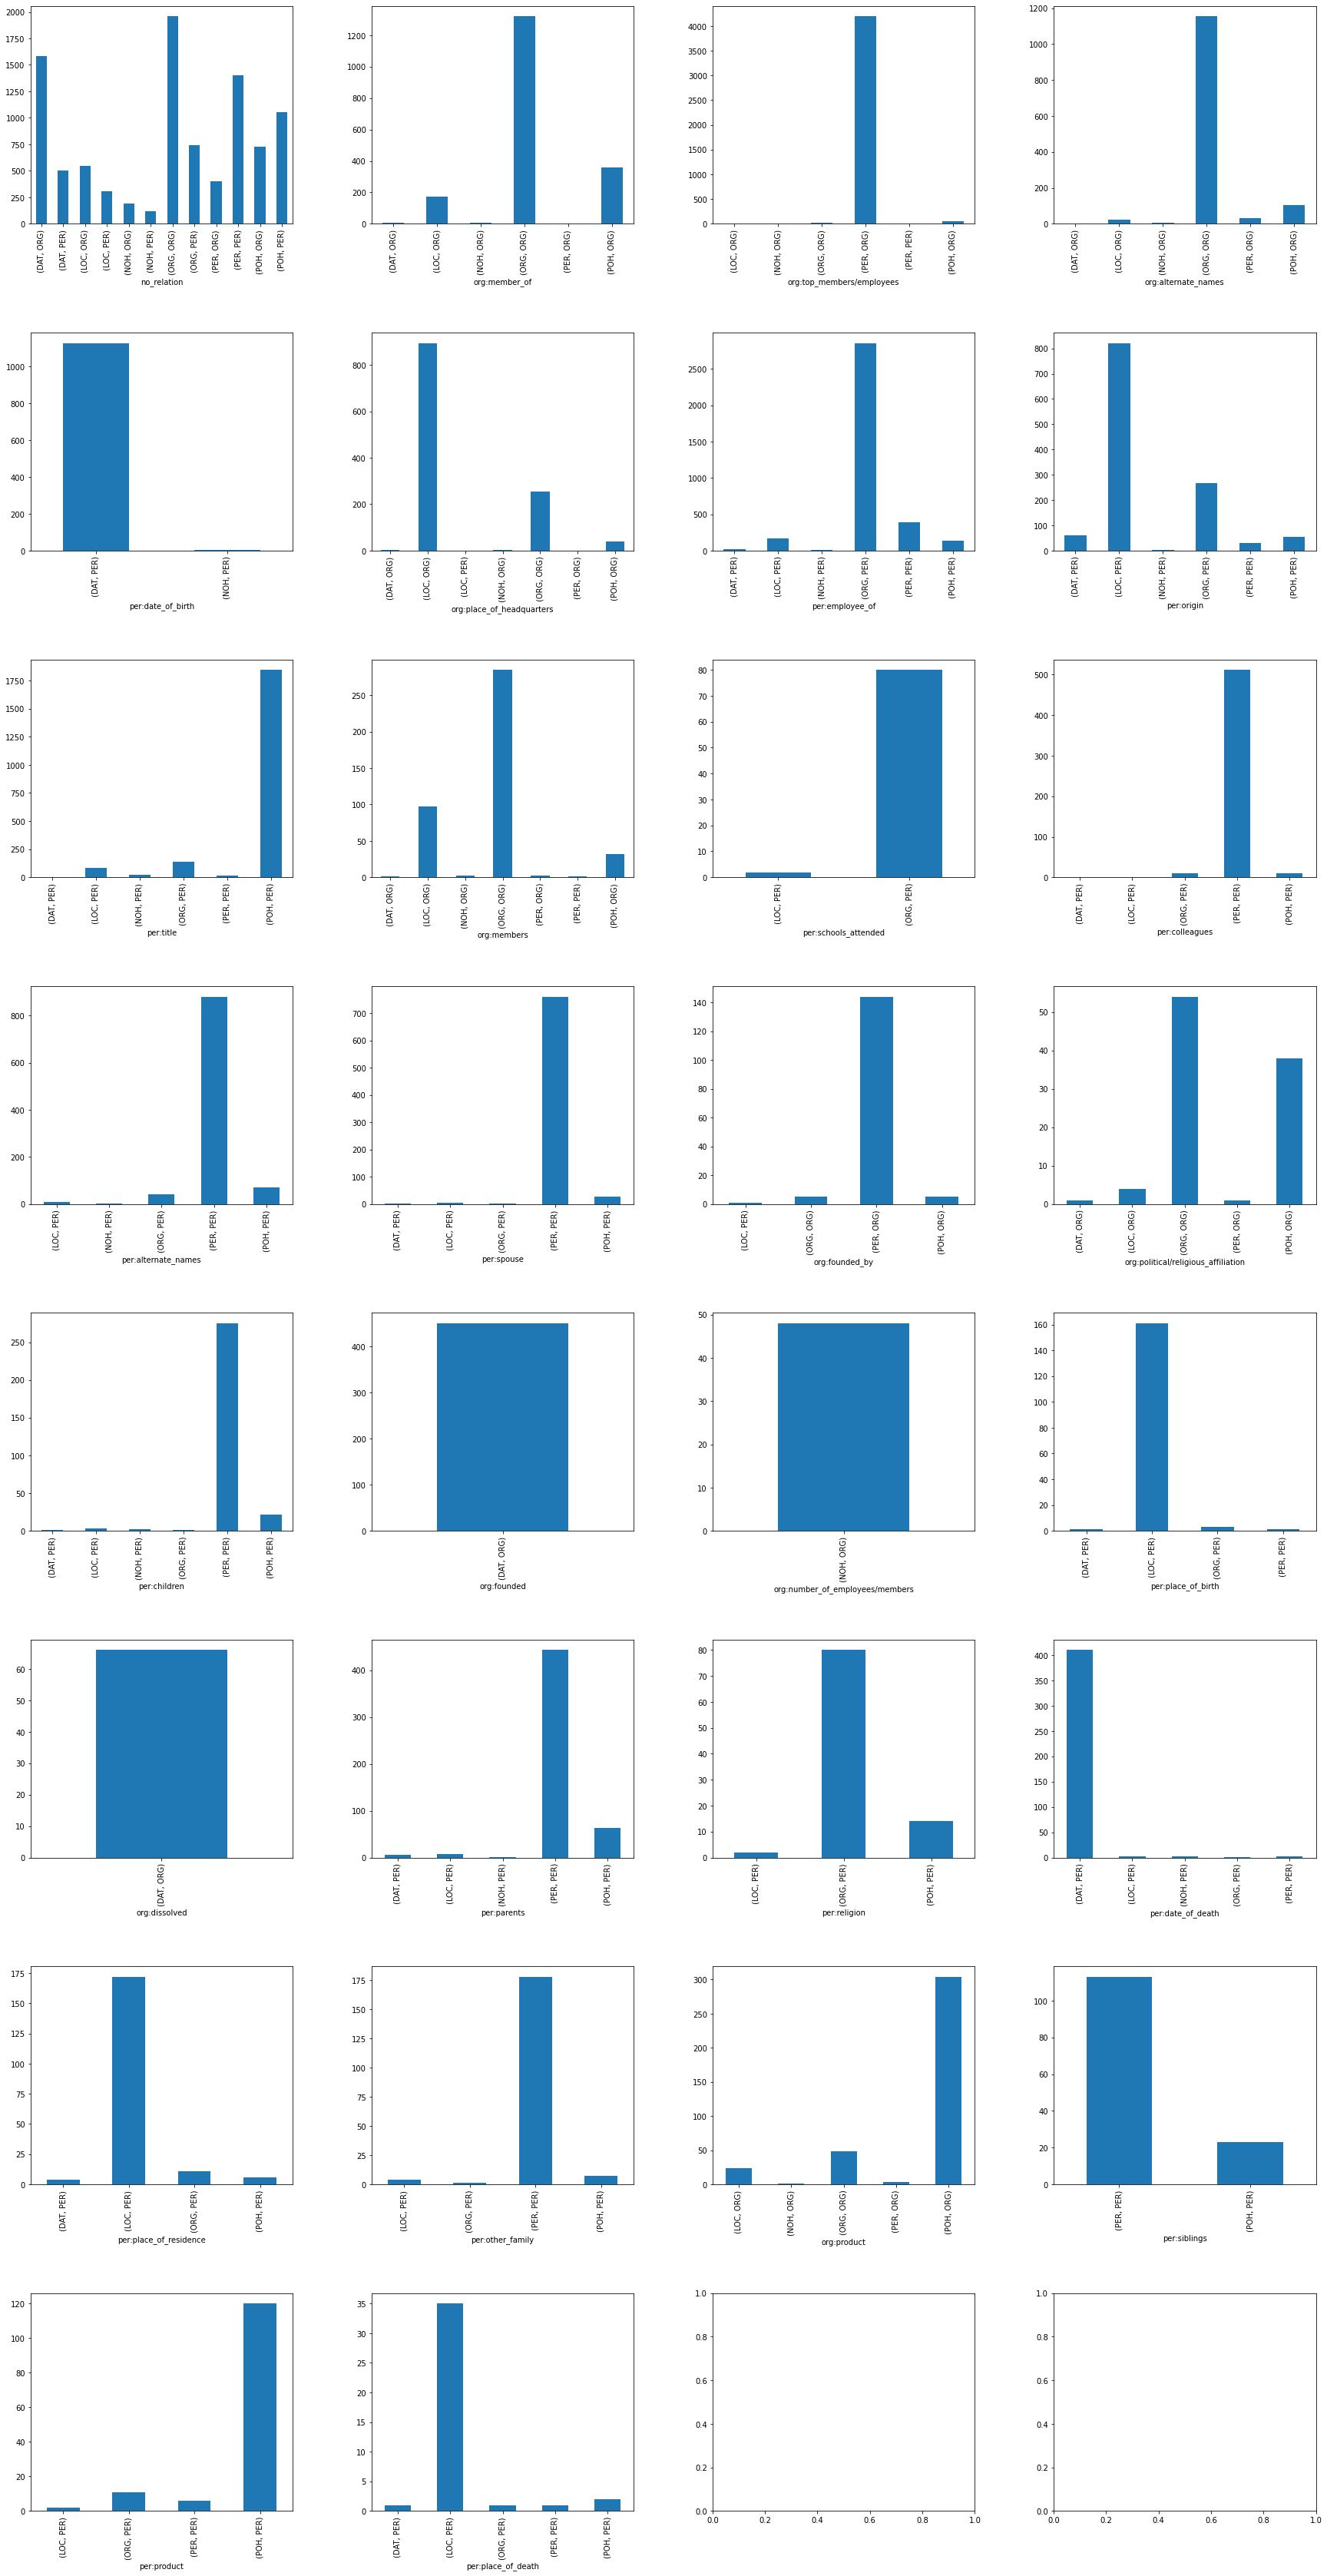

In [15]:
fig, axes = plt.subplots(8, 4, figsize=(30, 60))
axes= axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)


for num, label in enumerate(tra2.label.unique()):
    tra2[tra2.label == label].groupby(['object_type','subject_type']).count().id.plot(kind='bar',ax=axes[num])
    axes[num].set_xlabel(label)

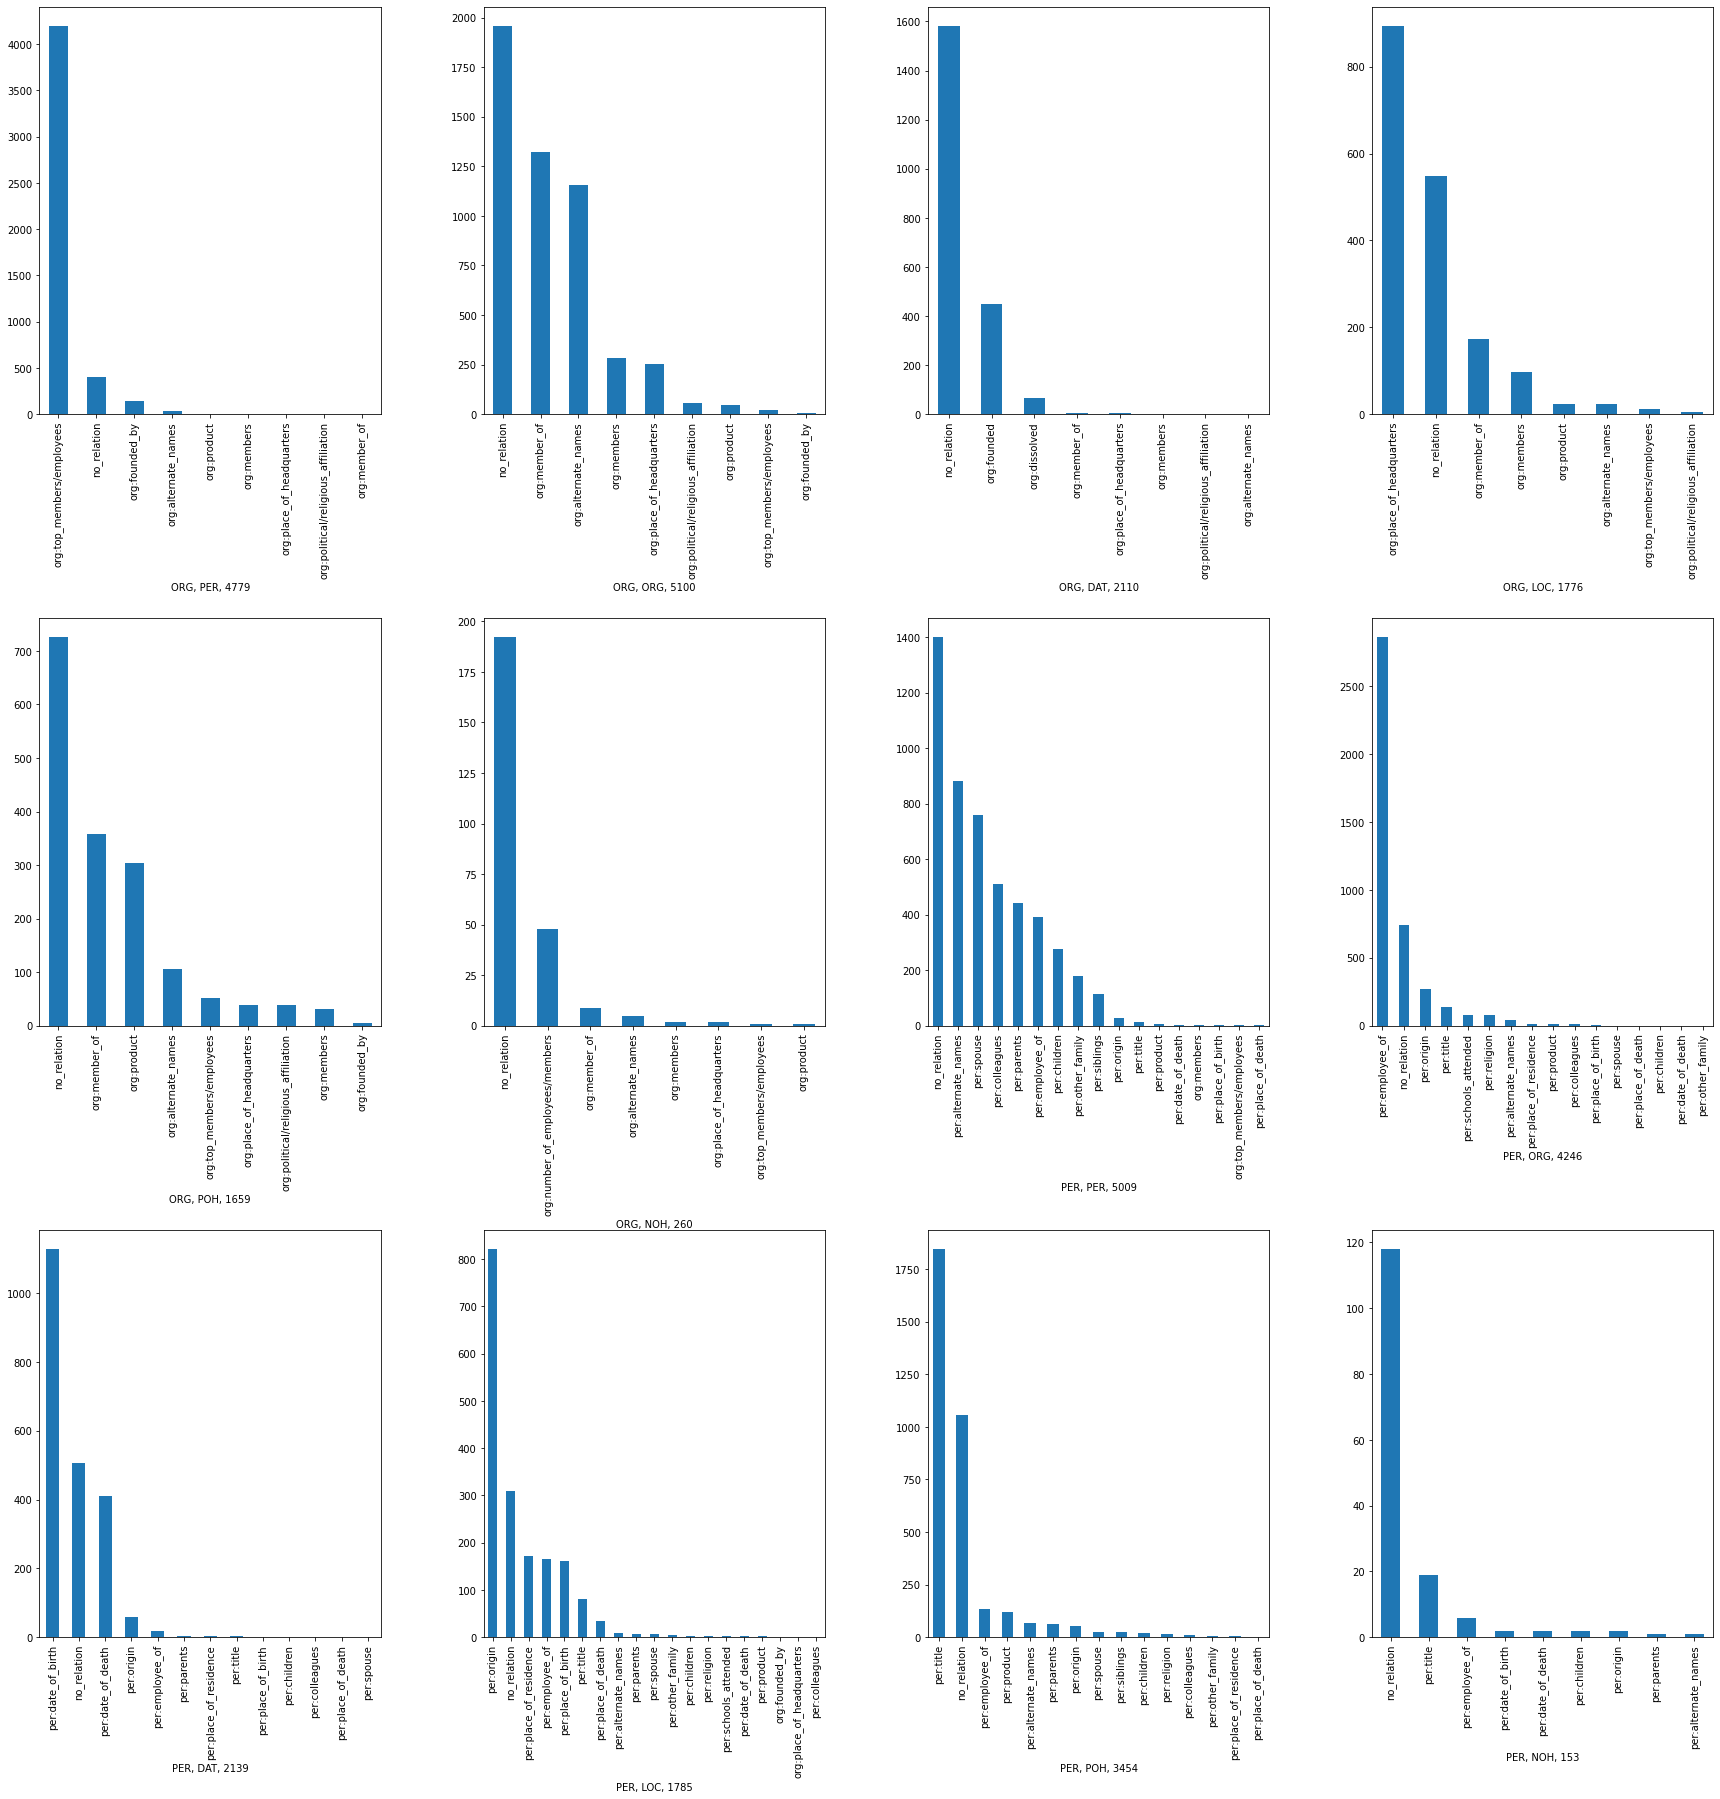

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(30, 30))
axes= axes.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

i=0
for num, label in enumerate(tra2.subject_type.unique()):
    for num2, ob in enumerate(tra2.object_type.unique()):

        tra2[(tra2.subject_type == label) & (tra2.object_type == ob)].label.value_counts().plot(kind='bar',ax=axes[i])
        axes[i].set_xlabel(f'{label}, {ob}, {tra2[(tra2.subject_type == label) & (tra2.object_type == ob)].shape[0]}',)
        i+=1

In [12]:
train_data2[train_data2.object_type == 'POH'].head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree,POH,PER
24,24,FA로 친정 팀에 돌아온 중견수 이택근과 1루수로 정착한 박병호와 함께 클린업 트리...,"{'word': '박병호', 'start_idx': 32, 'end_idx': 34...","{'word': '1루수', 'start_idx': 23, 'end_idx': 25...",per:title,wikipedia,POH,PER
30,30,미국 정부는 1942년 2월 24일 전 세계의 청취자를 대상으로 태평양 전쟁의 전쟁...,"{'word': '미국의 소리', 'start_idx': 61, 'end_idx':...","{'word': 'Voice of America', 'start_idx': 73, ...",org:alternate_names,wikipedia,POH,ORG
38,38,광주국악상설공연이 세계수영선수권대회 기간동안 연이어 매진을 기록하며 광주 대표 문화...,"{'word': '박애리', 'start_idx': 74, 'end_idx': 76...","{'word': '국악인', 'start_idx': 70, 'end_idx': 72...",per:title,wikitree,POH,PER
41,41,"이 캐릭터가 작가 스탠 리와 만화가 잭 커비가 만든 """" 에서 캡틴 아메리카의 전쟁...","{'word': '스탠 리', 'start_idx': 10, 'end_idx': 1...","{'word': '만화가', 'start_idx': 16, 'end_idx': 18...",no_relation,wikipedia,POH,PER


In [10]:
train_data2.object_type.unique()

array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object)

In [11]:
train_data2[train_data2.object_type == 'NOH'].object_entity

72       {'word': '49만 5,000명', 'start_idx': 46, 'end_i...
107      {'word': '031-909-9000', 'start_idx': 43, 'end...
109      {'word': '48kg', 'start_idx': 14, 'end_idx': 1...
192      {'word': '18팀', 'start_idx': 44, 'end_idx': 46...
194      {'word': '500만', 'start_idx': 87, 'end_idx': 9...
                               ...                        
32303    {'word': '홋카이도 제1구', 'start_idx': 28, 'end_idx...
32329    {'word': '13개', 'start_idx': 14, 'end_idx': 16...
32356    {'word': '12개', 'start_idx': 61, 'end_idx': 63...
32448    {'word': '14개', 'start_idx': 3, 'end_idx': 5, ...
32457    {'word': '1100대', 'start_idx': 61, 'end_idx': ...
Name: object_entity, Length: 413, dtype: object